Does the residual still work if we use a buffered version?

Yes but it's a flattened version of the residual over the time.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
from src.sources.fft import FFTSource
from src.var_processor.sensor import Sensor

In [2]:
a = np.arange(0,5).reshape(-1, 1); print(a, a.ravel(), a.ravel().shape)

[[0]
 [1]
 [2]
 [3]
 [4]] [0 1 2 3 4] (5,)


In [25]:
class SensorVisualizer:
    """Object to visualise Sensor.
    
    We can likely make this simpler and more efficient once we
    get it working.
    
    """

    def __init__(self, sensor):
        """Initialise.

        Args:
            sensor - Sensor object.
        """
        self.sensor = sensor
        # Start sensor if not started
        if not self.sensor.source.started:
            self.sensor.start()
        # Get number of stages
        num_stages = self.sensor.num_stages
        # Initialise subplots for stages plus top level signal
        self.figure, self.axes = plt.subplots(num_stages+1, 2)
        # Initialising animation
        self.animation = FuncAnimation(
            self.figure, self.update, save_count=200)
        # Set up x ranges for each bar plot
        
        # First configure the raw data
        # self.d_length = self.sensor.get_data_length()
        # self.x_d_range = np.linspace(0, self.d_length-1, self.d_length)
        self.x_d_range = None
        # Then configure the causes and residuals lengths
        # This will just be a regular spaced set of ticks up to length
        # of each set of causes and each set of residuals
        #c_lengths, r_lengths = self.sensor.get_lengths() # Do I even need this - can I get in the update method?
        #self.x_c_ranges = [np.linspace(0, c_len-1, c_len) for c_len in c_lengths]
        #self.x_r_ranges = [np.linspace(0, r_len-1, r_len) for r_len in r_lengths]
        self.x_c_ranges = list()
        self.x_r_ranges = list()
        
        # Set up containers for bar plots
        self.data_bar = None
        self.cause_bars = list()
        self.residual_bars = list()
        
        # Set Titles
        self.axes[0][0].set_title("Signal & Causes")
        self.axes[0][1].set_title("Residuals")
        # Setup variable to store bar plots
        # Clear ticks
        for ax in self.axes.ravel():
            ax.xaxis.set_major_locator(plt.NullLocator())
            # ax.yaxis.set_major_locator(plt.NullLocator())
        plt.subplots_adjust(wspace=0.5)

    def update(self, frame):
        """Update the visualisations."""
        # Iterate sensor
        frame = self.sensor.iterate()
        causes = self.sensor.get_causes()
        residuals = self.sensor.get_residuals()
        
        # For bar plots we need to iterate through previous plots
        # and remove then replot
        
        # Redraw sensor data if exists - else set x range
        if self.data_bar:
            self.data_bar.remove()
        else:
            self.x_d_range = np.linspace(0, frame.shape[0]-1, frame.shape[0])
        self.data_bar = self.axes[0][0].bar(
            self.x_d_range,
            frame.ravel(),
            color='r'
        )    
        
        # Plot causes first  - iterate through axes[0, 1:]
        for i, cause in enumerate(causes):
            if i < len(self.cause_bars):
                self.cause_bars[i].remove()
            else:
                self.x_c_ranges.append(
                    np.linspace(0, cause.shape[0]-1, cause.shape[0])
                )
            bar = self.axes[i+1][0].bar(
                self.x_c_ranges[i],
                cause.ravel(),
                color='b'
            )
            if i < len(self.cause_bars):
                self.cause_bars[i] = bar
            else:
                self.cause_bars.append(bar)
        # Then plot residuals - iterate through axes[1, 1:]
        for i, residual in enumerate(residuals):
            if i < len(self.residual_bars):
                self.residual_bars[i].remove()
            else:
                self.x_r_ranges.append(
                    np.linspace(0, residual.shape[0]-1, residual.shape[0])
                )
            bar = self.axes[i][1].bar(
                self.x_r_ranges[i],
                residual.ravel(),
                color='g'
            )
            if i < len(self.residual_bars):
                self.residual_bars[i] = bar
            else:
                self.residual_bars.append(bar)
                
        # time.sleep(0.1)
        return self.figure

    def show(self):
        """Show the visualisations."""
        plt.show()

<IPython.core.display.Javascript object>


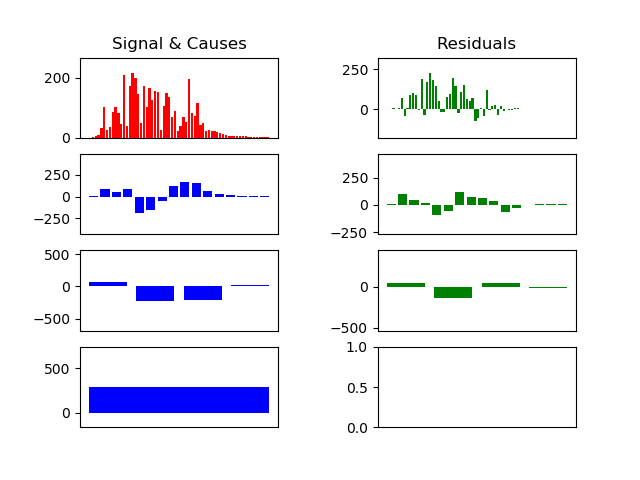

In [26]:
%matplotlib notebook
audio = FFTSource()
sensor = Sensor(audio, 4, 4)
sen_vis = SensorVisualizer(sensor)

In [16]:
sen_vis.cause_bars

[<BarContainer object of 16 artists>]

In [9]:
causes = sen_vis.sensor.get_causes()
print(causes[0].shape)

(16, 1)


In [11]:
for cause in causes:
    print(cause.ravel(), cause.shape)

[  8.23620256  20.04442136  32.10567776 160.40436616 145.31473824
 139.1153709  152.44721603  51.15494526  22.73054069  48.92653495
  33.82030788   8.8348291    4.19522553   1.96002776   1.71988023
   1.65099792] (16, 1)
[ 88.74007707 201.56179467  49.56348484   4.21835105] (4, 1)
[168.04020409] (1, 1)


In [ ]:
def test_sensor_visualiser():
    """Test the sensor visualiser."""
    # Test initialising
    audio = FFTSource()
    sensor = Sensor(audio, 4, 4)
    sen_vis = SensorVisualizer(sensor)
    assert self.axes.shape == (2, )
    